In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


# 1) Fact Classification Results

## MIMIC-CXR test set;  using dataset labels as ground-truth

Label sources 1:
- CheXpert Labeler (from reports, 14 labels)
- MIMIC-CXR-LT (long tail challenge, 26 labels)
- Chest ImaGenome (labels from scene graphs, 78)

Label source 2:
- GPT-4 + Hybrid NLI model

### Fact Classifier; trained on MIMIC-CXR training set; simple loss

In [23]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl"

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_

In [18]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chest_imagenome_nli_based_labels).pkl')
tmp

{'chest_imagenome_nli_based_labels_tp': [2144,
  1811,
  0,
  4,
  0,
  0,
  1437,
  930,
  0,
  1,
  68,
  1406,
  18,
  1,
  25,
  182,
  363,
  1049,
  2152,
  1693,
  146,
  3314,
  0,
  9,
  0,
  4,
  1540,
  80,
  2,
  69,
  950,
  0,
  0,
  6,
  305,
  1,
  0,
  104,
  0,
  150,
  270,
  1258,
  181,
  2,
  4,
  543,
  261,
  0,
  6,
  145,
  1966,
  0,
  27,
  184,
  82,
  1,
  1046,
  0,
  0,
  524,
  0,
  0,
  1169,
  0,
  2176,
  3206,
  85,
  131,
  411,
  492,
  386,
  0,
  2,
  61,
  17,
  0,
  39,
  19],
 'chest_imagenome_nli_based_labels_fp': [1713,
  2182,
  0,
  23,
  0,
  0,
  1917,
  1163,
  0,
  0,
  176,
  899,
  87,
  2,
  124,
  282,
  818,
  1351,
  2592,
  2607,
  392,
  1439,
  2,
  23,
  0,
  6,
  858,
  109,
  27,
  159,
  851,
  0,
  29,
  25,
  2607,
  2,
  7,
  150,
  20,
  333,
  3051,
  1342,
  633,
  17,
  21,
  260,
  1426,
  0,
  59,
  261,
  1197,
  0,
  64,
  575,
  196,
  6,
  1095,
  1,
  0,
  746,
  11,
  9,
  791,
  1,
  1075,
  975,
  835,
  

In [28]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_

Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chest_imagenome,tuned_thresholds).pkl
--------------------------------------------------
6) Computing metrics with NLI-based labels with CheXpert facts
n_undecided = 218188/479787
probs_.shape = (5159, 14)
gt_labels_.shape = (5159, 14)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
7) Computing metrics with NLI-based labels with MIMIC

### Fact Classifier; trained on MIMIC-CXR training set; weighted loss + more balanced sampling

In [1]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240503_230653_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl"

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240503_230653_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_

In [7]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240503_230653_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240503_230653_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_

Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240503_230653_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(mimic_cxr_lt_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
8) Computing metrics with NLI-based labels and Chest ImaGenome facts
n_undecided = 218188/479787
probs_.shape = (5159, 78)
gt_labels_.shape = (5159, 78)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240503_230653_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chest_imagenome_nli_based_labels,tuned_thresholds).pkl


### Fact Classifier; MIMIC-CXR; only label-based facts; weighted loss + more balanced sampling

In [21]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240504_151812_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240504_151812_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_

n_undecided = 218188/479787
probs_.shape = (5159, 26)
gt_labels_.shape = (5159, 26)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240504_151812_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(mimic_cxr_lt_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
8) Computing metrics with NLI-based labels and Chest ImaGenome facts
n_undecided = 218188/479787
probs_.shape = (5159, 78)
gt_labels_.shape = (5159, 78)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240504_151812_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classific

### Fact Classifier; MIMIC-CXR + VinBig; weighted loss + more balanced sampling

In [16]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_010353_mim-facts+vinbig_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_010353_mim-facts+vinbig_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq

Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_010353_mim-facts+vinbig_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
7) Computing metrics with NLI-based labels and MIMIC-CXR LT facts
n_undecided = 218188/479787
probs_.shape = (5159, 26)
gt_labels_.shape = (5159, 26)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_010353_mim-facts+vinbig_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(mimic_cxr_lt_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
8) Computing metrics with NLI-based label

### Fact Classifier; MIMIC-CXR + VinBig; weighted loss + more balanced sampling; no att. reg.; no contrastive loss

In [23]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_104907_mim-facts+vinbig_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_104907_mim-facts+vinbig_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq

Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_104907_mim-facts+vinbig_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
7) Computing metrics with NLI-based labels and MIMIC-CXR LT facts
n_undecided = 218188/479787
probs_.shape = (5159, 26)
gt_labels_.shape = (5159, 26)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_104907_mim-facts+vinbig_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(mimic_cxr_lt_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
8) Computing metrics with NLI-based labels and Chest ImaGenome facts
n_undecided = 21

### Fact Classifier; MIMIC-CXR + VinBig + CheXpert + CheXlocalize; weighted loss + more balanced sampling; no att. reg.; no contrastive loss

In [24]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/la

Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
7) Computing metrics with NLI-based labels and MIMIC-CXR LT facts
n_undecided = 218188/479787
probs_.shape = (5159, 26)
gt_labels_.shape = (5159, 26)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(mimic_cxr_lt_nli_based_labels,tuned_thresholds).pkl
-----------------------------------------------

### Fact Classifier; MIMIC-CXR + VinBig + CheXpert + CheXlocalize; weighted loss + more balanced sampling; no att. reg.; no contrastive loss

In [170]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--chexpert_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl" \
--chest_imagenome_image_id_to_labels_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/imageId2labels(min_freq=0,num_labels=832).pkl" \
--chest_imagenome_label_names_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/labels(min_freq=0,num_labels=832).pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--tune_thresholds

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/chexpert_labels_per_report__20220904_113605.pkl
   chest_imagenome_label_names_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_image

--------------------------------------------------
6) Computing metrics with NLI-based labels and CheXpert facts
n_undecided = 218188/479787
probs_.shape = (5159, 14)
gt_labels_.shape = (5159, 14)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240509_221438_mim-facts+vinbig+chexloc+chxp+iuxray_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert_nli_based_labels,tuned_thresholds).pkl
--------------------------------------------------
7) Computing metrics with NLI-based labels and MIMIC-CXR LT facts
n_undecided = 218188/479787
probs_.shape = (5159, 26)
gt_labels_.shape = (5159, 26)
Computing tp, fp, tn, fn per class ...
Computing accuracy ...
Computing prf1 ...
Computing roc auc ...
Computing prc auc ...
Fact classification metrics saved to /mnt/data/pamessina/workspac

# Fact Classification Results

In [3]:
from importlib import reload
import medvqa

In [5]:
# reload(medvqa.utils.constants)
# reload(medvqa.evaluation.results)

In [6]:
from medvqa.evaluation.results import get_phrase_grounding_classification_metrics_dataframe
from medvqa.eval_fact_classification import plot_label_based_metrics
from medvqa.utils.constants import (
    LABEL_BASED_FACTS__CHEXPERT,
    LABEL_BASED_FACTS__MIMIC_CXR_LT,
    LABEL_BASED_FACTS__CHEST_IMAGENOME,
    LABEL_BASED_FACTS__CHEXPERT_2_SHORT,
    LABEL_BASED_FACTS__MIMIC_CXR_LT_2_SHORT,
    LABEL_BASED_FACTS__CHEST_IMAGENOME_2_SHORT,
)
from importlib import reload
import medvqa

In [7]:
df_chexp = get_phrase_grounding_classification_metrics_dataframe(
    dataset_name='mimiccxr_test_set',
    metric_prefix='chexpert',
    class_names=LABEL_BASED_FACTS__CHEXPERT,
    class_name2short=LABEL_BASED_FACTS__CHEXPERT_2_SHORT,
)

9it [00:00, 245.75it/s]


In [8]:
df_chexp_nli_based = get_phrase_grounding_classification_metrics_dataframe(
    dataset_name='mimiccxr_test_set',
    metric_prefix='chexpert_nli_based_labels',
    class_names=LABEL_BASED_FACTS__CHEXPERT,
    class_name2short=LABEL_BASED_FACTS__CHEXPERT_2_SHORT,
)

9it [00:00, 2302.59it/s]


In [9]:
df_mimcxr_lt = get_phrase_grounding_classification_metrics_dataframe(
    dataset_name='mimiccxr_test_set',
    metric_prefix='mimic_cxr_lt',
    class_names=LABEL_BASED_FACTS__MIMIC_CXR_LT,
    class_name2short=LABEL_BASED_FACTS__MIMIC_CXR_LT_2_SHORT,
)

9it [00:00, 412.31it/s]


In [10]:
df_mimcxr_lt_nli_based = get_phrase_grounding_classification_metrics_dataframe(
    dataset_name='mimiccxr_test_set',
    metric_prefix='mimic_cxr_lt_nli_based_labels',
    class_names=LABEL_BASED_FACTS__MIMIC_CXR_LT,
    class_name2short=LABEL_BASED_FACTS__MIMIC_CXR_LT_2_SHORT,
)

9it [00:00, 768.80it/s]


In [11]:
df_chestimgn = get_phrase_grounding_classification_metrics_dataframe(
    dataset_name='mimiccxr_test_set',
    metric_prefix='chest_imagenome',
    class_names=LABEL_BASED_FACTS__CHEST_IMAGENOME,
    class_name2short=LABEL_BASED_FACTS__CHEST_IMAGENOME_2_SHORT,
)

9it [00:00, 1577.33it/s]


In [12]:
df_chestimgn_nli_based = get_phrase_grounding_classification_metrics_dataframe(
    dataset_name='mimiccxr_test_set',
    metric_prefix='chest_imagenome_nli_based_labels',
    class_names=LABEL_BASED_FACTS__CHEST_IMAGENOME,
    class_name2short=LABEL_BASED_FACTS__CHEST_IMAGENOME_2_SHORT,
)

9it [00:00, 805.31it/s]


In [13]:
columns = ['exp_timestamp', 'modif_time', 'model', 'mimiccxr_trainer_kwargs', 'parenthesis', 'datasets',
           'losses',
           'prcauc(macro)', 'prcauc(micro)', 'f1(macro)', 'f1(micro)']

In [14]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.float_format')
# pd.reset_option('display.max_colwidth')

In [15]:
df_aux = df_chestimgn_nli_based[columns]
# df_aux = df_aux.sort_values('prcauc(macro)', ascending=False)
df_aux = df_aux.sort_values('exp_timestamp', ascending=False)
df_aux

,exp_timestamp,modif_time,model,mimiccxr_trainer_kwargs,parenthesis,datasets,losses,prcauc(macro),prcauc(micro),f1(macro),f1(micro)
0,20240509_221438,2024-05-10 10:07:45,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all","chest_imagenome_nli_based_labels,tuned_thresholds",5:mim-facts+vinbig+chexloc+chxp+iuxray,"aslw=2.0,pclw=2.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.331149,0.492603,0.354865,0.533488
1,20240505_224220,2024-05-06 17:56:25,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chest_imagenome_nli_based_labels,tuned_thresholds",4:mim-facts+vinbig+chexloc+chxp,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0",0.323023,0.416047,0.349304,0.507650
8,20240505_104907,2024-05-06 17:53:25,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chest_imagenome_nli_based_labels,tuned_thresholds",2:mim-facts+vinbig,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0",0.327190,0.431468,0.354653,0.526342
7,20240505_010353,2024-05-05 09:48:39,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chest_imagenome_nli_based_labels,tuned_thresholds",2:mim-facts+vinbig,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.327465,0.395200,0.355873,0.532344
4,20240504_151812,2024-05-05 10:07:13,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chest_imagenome_nli_based_labels,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.325540,0.408699,0.350110,0.532291
2,20240503_230653,2024-05-04 10:42:31,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all",chest_imagenome_nli_based_labels,1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.308469,0.496747,0.298160,0.518251
3,20240503_230653,2024-05-04 11:44:04,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all","chest_imagenome_nli_based_labels,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.308469,0.496747,0.335254,0.526597
5,20240426_072308,2024-04-30 01:07:57,"PhraseGrounder(dn121,128,256)",ditpnffp=all,chest_imagenome_nli_based_labels,1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,attregl,acpgl",0.291186,0.540010,0.276537,0.560854
6,20240426_072308,2024-04-30 08:37:08,"PhraseGrounder(dn121,128,256)",ditpnffp=all,"chest_imagenome_nli_based_labels,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,attregl,acpgl",0.291186,0.540010,0.317850,0.510579


In [16]:
df_aux = df_chexp_nli_based[columns]
# df_aux = df_aux.sort_values('prcauc(macro)', ascending=False)
df_aux = df_aux.sort_values('exp_timestamp', ascending=False)
df_aux

,exp_timestamp,modif_time,model,mimiccxr_trainer_kwargs,parenthesis,datasets,losses,prcauc(macro),prcauc(micro),f1(macro),f1(micro)
0,20240509_221438,2024-05-10 10:07:39,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all","chexpert_nli_based_labels,tuned_thresholds",5:mim-facts+vinbig+chexloc+chxp+iuxray,"aslw=2.0,pclw=2.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.554236,0.677775,0.558426,0.667420
1,20240505_224220,2024-05-06 17:56:20,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert_nli_based_labels,tuned_thresholds",4:mim-facts+vinbig+chexloc+chxp,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0",0.555589,0.679787,0.553921,0.658555
8,20240505_104907,2024-05-06 17:53:19,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert_nli_based_labels,tuned_thresholds",2:mim-facts+vinbig,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0",0.559142,0.675259,0.564767,0.665951
7,20240505_010353,2024-05-05 09:48:33,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert_nli_based_labels,tuned_thresholds",2:mim-facts+vinbig,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.562146,0.669080,0.563104,0.668294
4,20240504_151812,2024-05-05 10:07:07,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert_nli_based_labels,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.566971,0.665429,0.567896,0.671767
2,20240503_230653,2024-05-04 10:42:25,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all",chexpert_nli_based_labels,1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.559997,0.675122,0.542426,0.663483
3,20240503_230653,2024-05-04 11:43:58,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all","chexpert_nli_based_labels,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.559997,0.675122,0.557840,0.669250
5,20240426_072308,2024-04-30 01:07:52,"PhraseGrounder(dn121,128,256)",ditpnffp=all,chexpert_nli_based_labels,1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,attregl,acpgl",0.546453,0.673030,0.542337,0.658903
6,20240426_072308,2024-04-30 08:37:05,"PhraseGrounder(dn121,128,256)",ditpnffp=all,"chexpert_nli_based_labels,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,attregl,acpgl",0.546453,0.673030,0.552107,0.665580


In [17]:
df_aux = df_chexp[columns]
# df_aux = df_aux.sort_values('prcauc(macro)', ascending=False)
df_aux = df_aux.sort_values('exp_timestamp', ascending=False)
df_aux

,exp_timestamp,modif_time,model,mimiccxr_trainer_kwargs,parenthesis,datasets,losses,prcauc(macro),prcauc(micro),f1(macro),f1(micro)
0,20240509_221438,2024-05-10 10:07:26,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all","chexpert,tuned_thresholds",5:mim-facts+vinbig+chexloc+chxp+iuxray,"aslw=2.0,pclw=2.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.423476,0.402363,0.443616,0.542096
1,20240505_224220,2024-05-06 17:56:08,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert,tuned_thresholds",4:mim-facts+vinbig+chexloc+chxp,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0",0.415636,0.388061,0.445439,0.538086
8,20240505_104907,2024-05-06 17:53:07,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert,tuned_thresholds",2:mim-facts+vinbig,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0",0.424255,0.382847,0.455604,0.547768
7,20240505_010353,2024-05-05 09:48:21,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert,tuned_thresholds",2:mim-facts+vinbig,"aslw=3.0,pclw=1.0,forlw=1.5,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.426153,0.380333,0.452047,0.544261
4,20240504_151812,2024-05-05 10:06:56,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=label_based","chexpert,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.428752,0.370125,0.449379,0.546385
2,20240503_230653,2024-05-04 10:42:08,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all",chexpert,1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.419530,0.379834,0.418429,0.514785
3,20240503_230653,2024-05-04 11:43:46,"PhraseGrounder(dn121,128,256)","blmst,uwpcl,ditpnffp=all","chexpert,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,bmcln=focal+bce+wbce,foclw=1.0,bcelw=1.0,wbcelw=1.0,attregl,acpgl",0.419530,0.379834,0.446747,0.547726
5,20240426_072308,2024-04-30 01:07:36,"PhraseGrounder(dn121,128,256)",ditpnffp=all,chexpert,1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,attregl,acpgl",0.413355,0.381333,0.433514,0.521241
6,20240426_072308,2024-04-30 08:36:58,"PhraseGrounder(dn121,128,256)",ditpnffp=all,"chexpert,tuned_thresholds",1:mim-facts,"aslw=1.0,pclw=1.0,forlw=1.0,blw=1.0,attregl,acpgl",0.413355,0.381333,0.437694,0.540925


In [18]:
from medvqa.utils.files import load_pickle

In [17]:
reload(medvqa.eval_fact_classification)

<module 'medvqa.eval_fact_classification' from '/home/pamessina/medvqa/medvqa/eval_fact_classification.py'>

# Plots

In [157]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [19]:
from medvqa.evaluation.plots import plot_metric_bars_per_method

In [20]:
metric_names = ['acc', 'f1(macro)', 'f1(micro)', 'prcauc(macro)', 'prcauc(micro)', 'rocauc(macro)', 'rocauc(micro)']
metric_aliases = ['acc', 'f1(macro)', 'f1(micro)', 'prcauc(macro)', 'prcauc(micro)', 'rocauc(macro)', 'rocauc(micro)']

In [21]:
%matplotlib inline

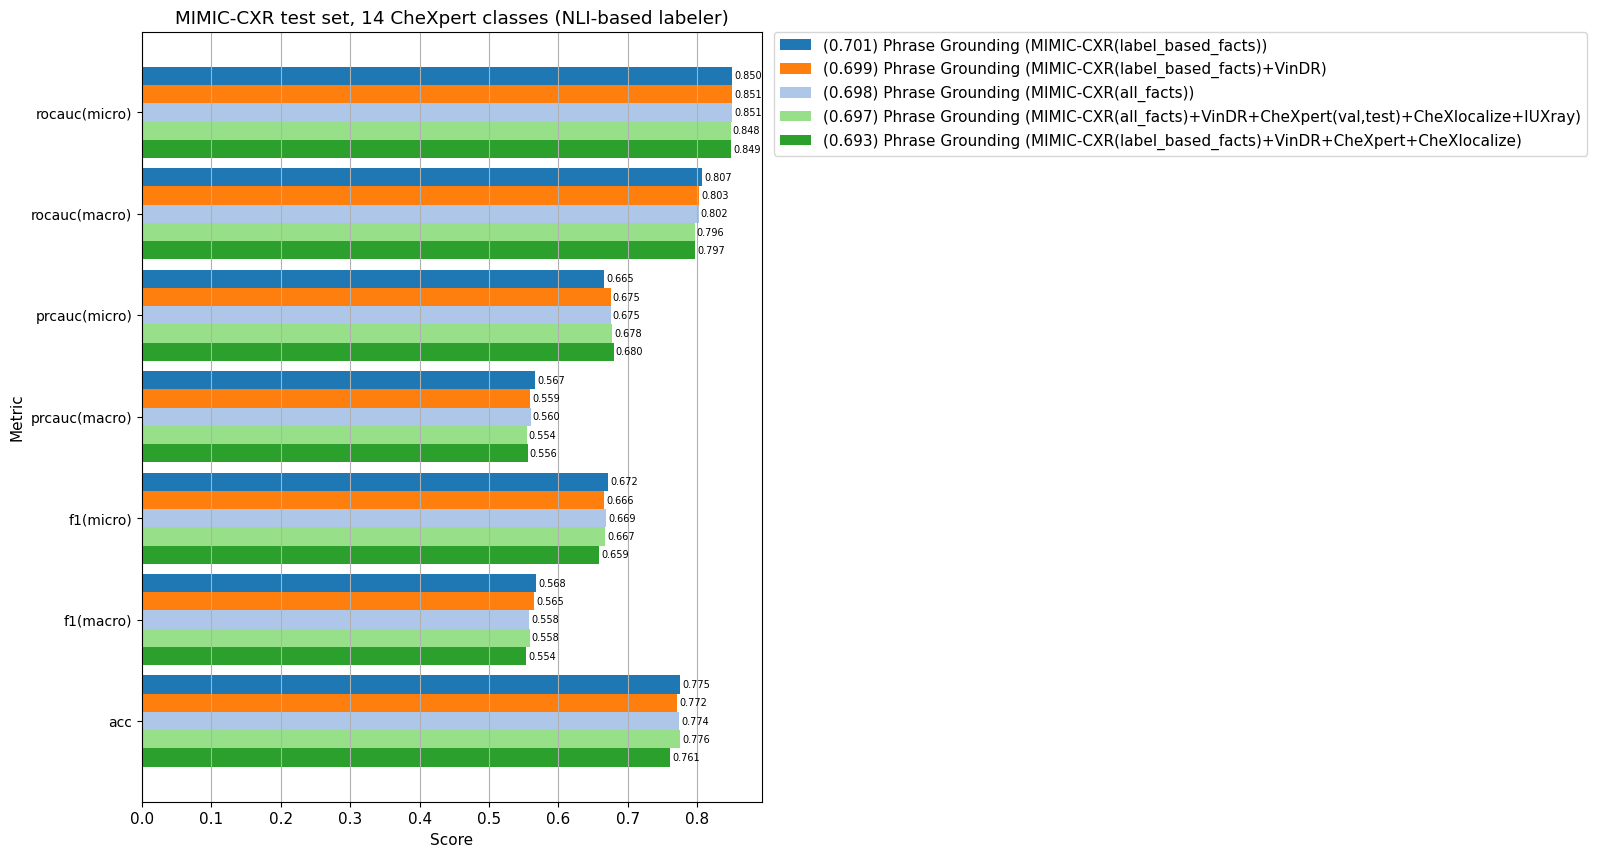

In [22]:
df = df_chexp_nli_based
_dataframe_rows = [
    df.loc[(df['exp_timestamp'] == '20240504_151812') & (df['modif_time'] == '2024-05-05 10:07:07')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240503_230653') & (df['modif_time'] == '2024-05-04 11:43:58')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240505_104907') & (df['modif_time'] == '2024-05-06 17:53:19')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240505_224220') & (df['modif_time'] == '2024-05-06 17:56:20')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240509_221438') & (df['modif_time'] == '2024-05-10 10:07:39')].iloc[0],
]
_method_aliases = [
    'Phrase Grounding (MIMIC-CXR(label_based_facts))',
    'Phrase Grounding (MIMIC-CXR(all_facts))',
    'Phrase Grounding (MIMIC-CXR(label_based_facts)+VinDR)',
    'Phrase Grounding (MIMIC-CXR(label_based_facts)+VinDR+CheXpert+CheXlocalize)',
    'Phrase Grounding (MIMIC-CXR(all_facts)+VinDR+CheXpert(val,test)+CheXlocalize+IUXray)',
]
assert len(_dataframe_rows) == len(_method_aliases)

plot_metric_bars_per_method(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='MIMIC-CXR test set, 14 CheXpert classes (NLI-based labeler)',
    figsize=(8, 10),
    sort_metrics=False,
#     vertical=True,
)

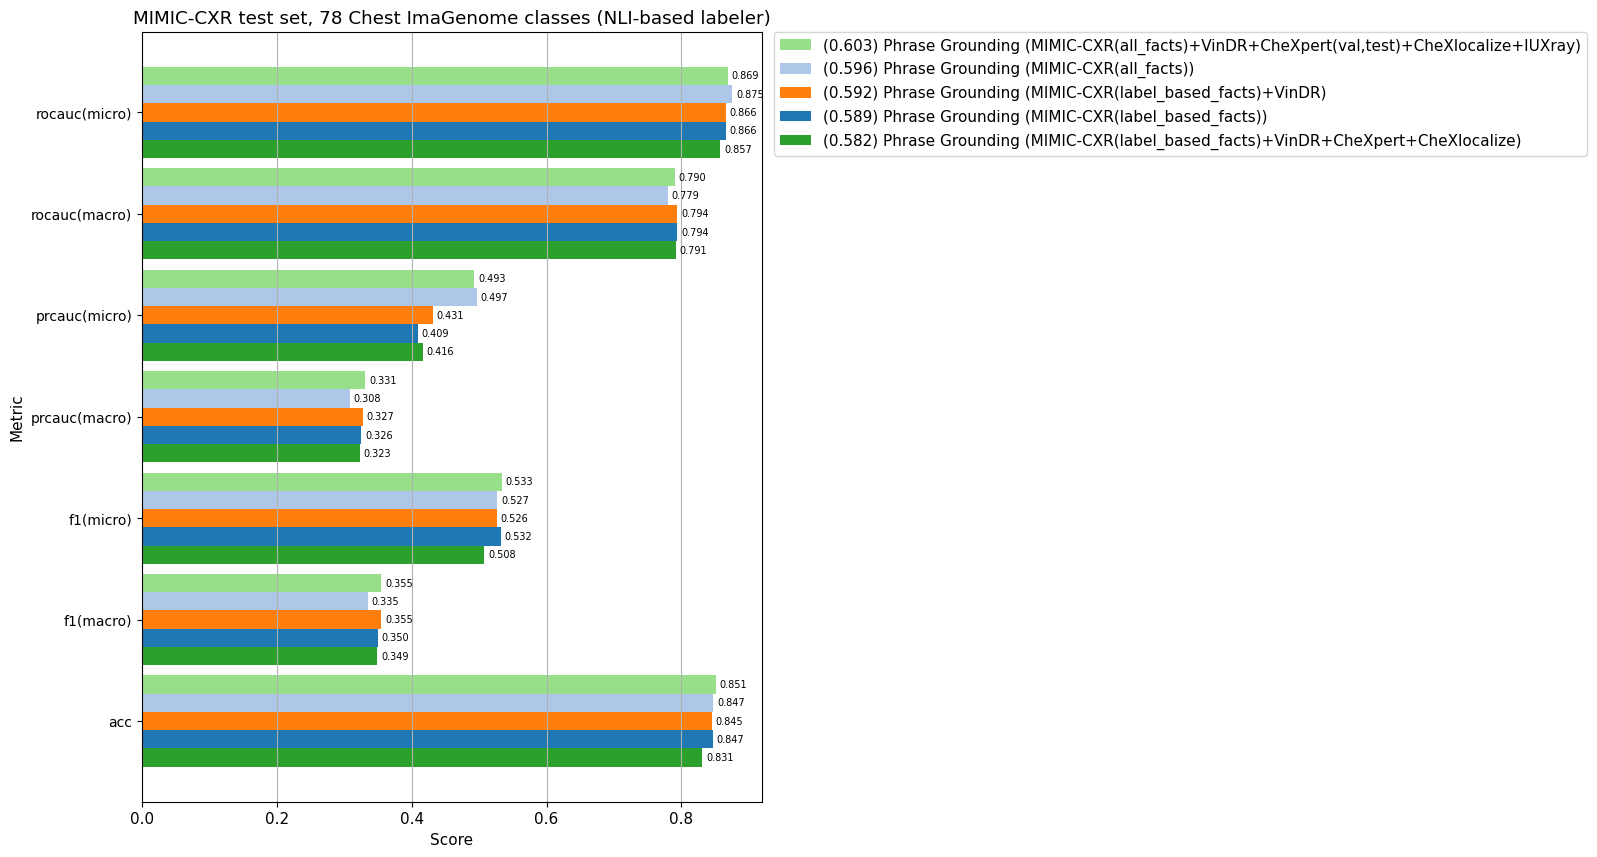

In [190]:
df = df_chestimgn_nli_based
_dataframe_rows = [
    df.loc[(df['exp_timestamp'] == '20240504_151812') & (df['modif_time'] == '2024-05-05 10:07:13')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240503_230653') & (df['modif_time'] == '2024-05-04 11:44:04')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240505_104907') & (df['modif_time'] == '2024-05-06 17:53:25')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240505_224220') & (df['modif_time'] == '2024-05-06 17:56:25')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240509_221438') & (df['modif_time'] == '2024-05-10 10:07:45')].iloc[0],
]
_method_aliases = [
    'Phrase Grounding (MIMIC-CXR(label_based_facts))',
    'Phrase Grounding (MIMIC-CXR(all_facts))',
    'Phrase Grounding (MIMIC-CXR(label_based_facts)+VinDR)',
    'Phrase Grounding (MIMIC-CXR(label_based_facts)+VinDR+CheXpert+CheXlocalize)',
    'Phrase Grounding (MIMIC-CXR(all_facts)+VinDR+CheXpert(val,test)+CheXlocalize+IUXray)',
]
assert len(_dataframe_rows) == len(_method_aliases)

plot_metric_bars_per_method(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='MIMIC-CXR test set, 78 Chest ImaGenome classes (NLI-based labeler)',
    figsize=(8, 10),
    sort_metrics=False,
#     vertical=True,
)

In [192]:
def get_dataframe_row(df, exp_timestamp, modif_time):
    return df.loc[(df['exp_timestamp'] == exp_timestamp) & (df['modif_time'] == modif_time)].iloc[0]

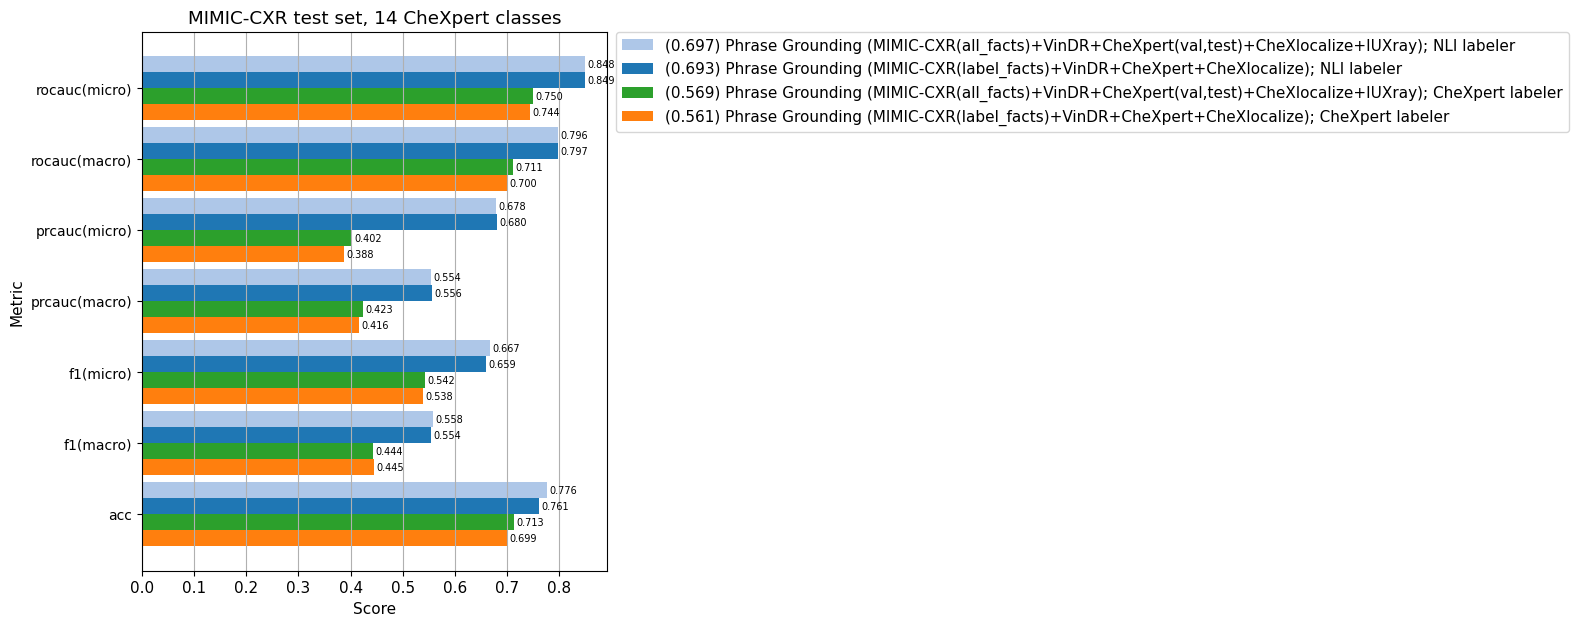

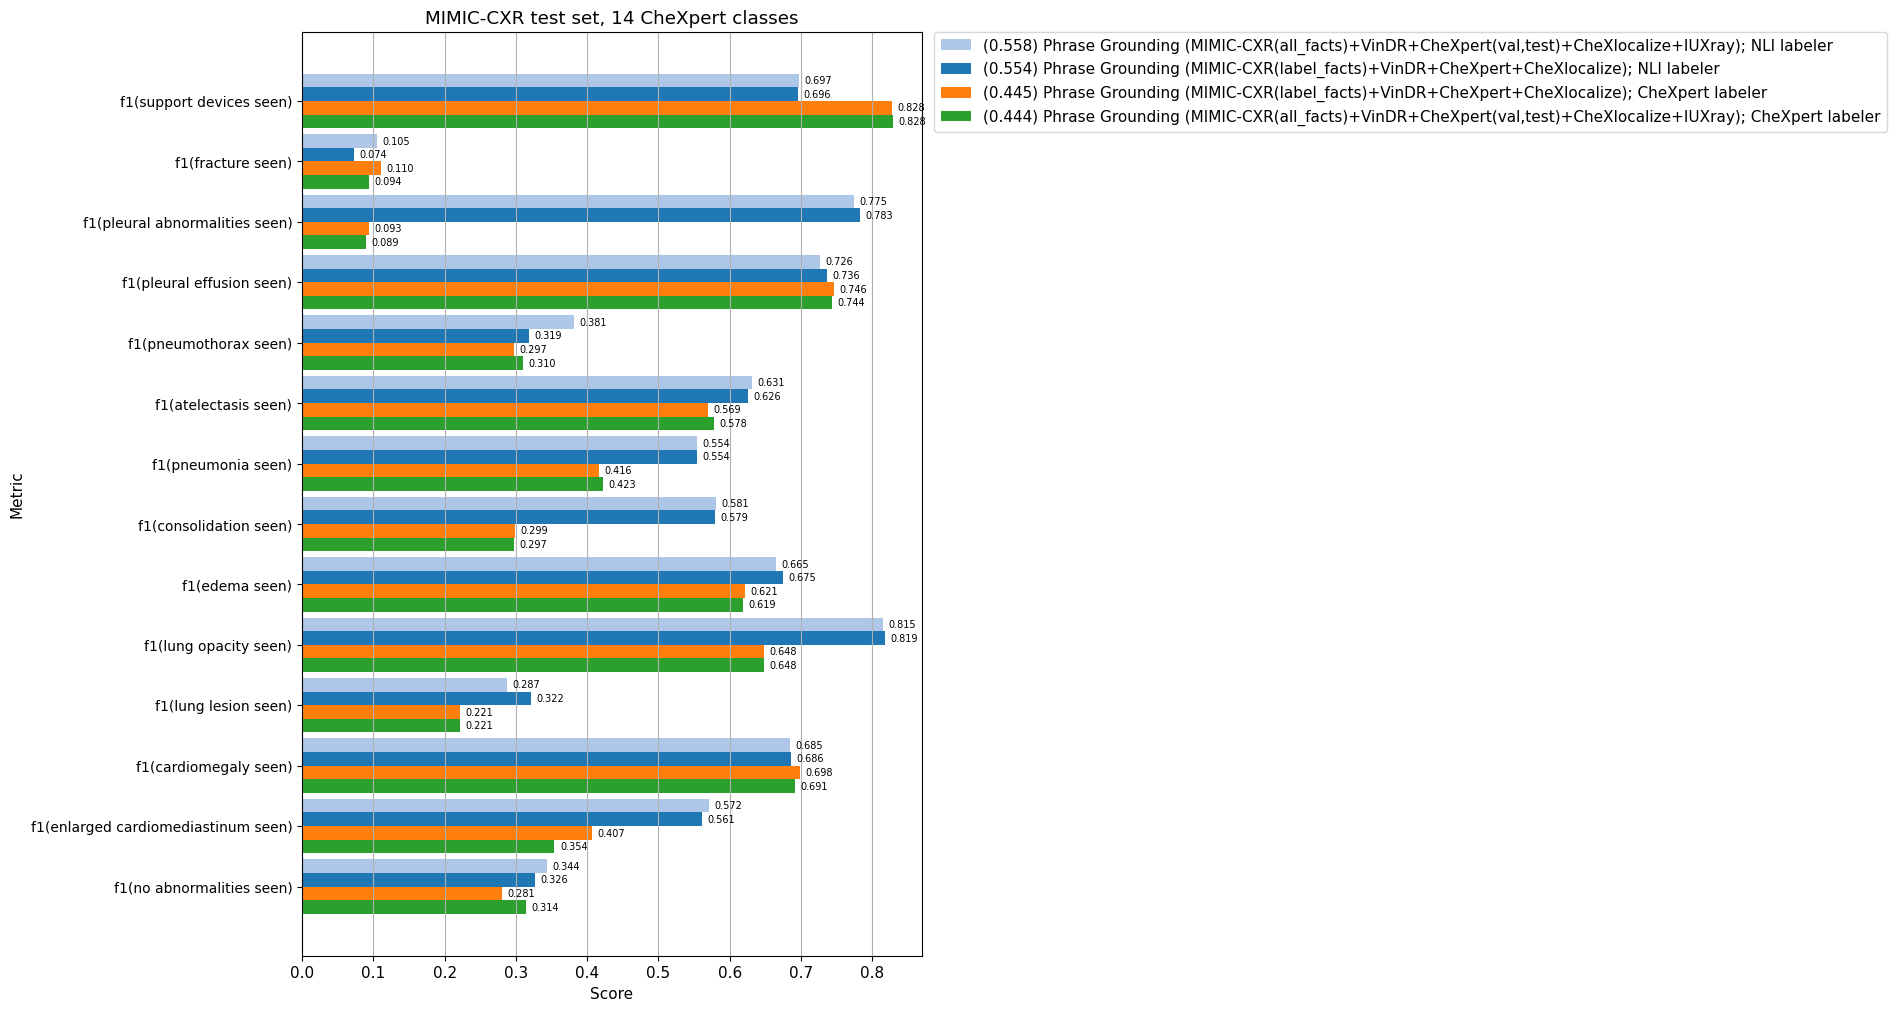

In [197]:
_dataframe_rows = [
    get_dataframe_row(df_chexp_nli_based, '20240505_224220', '2024-05-06 17:56:20'),
    get_dataframe_row(df_chexp_nli_based, '20240509_221438', '2024-05-10 10:07:39'),
    
    get_dataframe_row(df_chexp,           '20240505_224220', '2024-05-06 17:56:08'),
    get_dataframe_row(df_chexp,           '20240509_221438', '2024-05-10 10:07:26'),
]
_method_aliases = [
    'Phrase Grounding (MIMIC-CXR(label_facts)+VinDR+CheXpert+CheXlocalize); NLI labeler',
    'Phrase Grounding (MIMIC-CXR(all_facts)+VinDR+CheXpert(val,test)+CheXlocalize+IUXray); NLI labeler',
    
    'Phrase Grounding (MIMIC-CXR(label_facts)+VinDR+CheXpert+CheXlocalize); CheXpert labeler',
    'Phrase Grounding (MIMIC-CXR(all_facts)+VinDR+CheXpert(val,test)+CheXlocalize+IUXray); CheXpert labeler',
]
assert len(_dataframe_rows) == len(_method_aliases)


metric_names = ['acc', 'f1(macro)', 'f1(micro)', 'prcauc(macro)', 'prcauc(micro)', 'rocauc(macro)', 'rocauc(micro)']
metric_aliases = ['acc', 'f1(macro)', 'f1(micro)', 'prcauc(macro)', 'prcauc(micro)', 'rocauc(macro)', 'rocauc(micro)']

plot_metric_bars_per_method(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='MIMIC-CXR test set, 14 CheXpert classes',
    figsize=(6, 7),
    sort_metrics=False,
#     vertical=True,
)


from medvqa.utils.constants import LABEL_BASED_FACTS__CHEXPERT, LABEL_BASED_FACTS__CHEXPERT_2_SHORT

metric_names = [f'f1({LABEL_BASED_FACTS__CHEXPERT_2_SHORT[x]})' for x in LABEL_BASED_FACTS__CHEXPERT]
metric_aliases = [f'f1({x})' for x in LABEL_BASED_FACTS__CHEXPERT]

plot_metric_bars_per_method(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='MIMIC-CXR test set, 14 CheXpert classes',
    figsize=(8, 12),
    sort_metrics=False,
#     vertical=True,
)

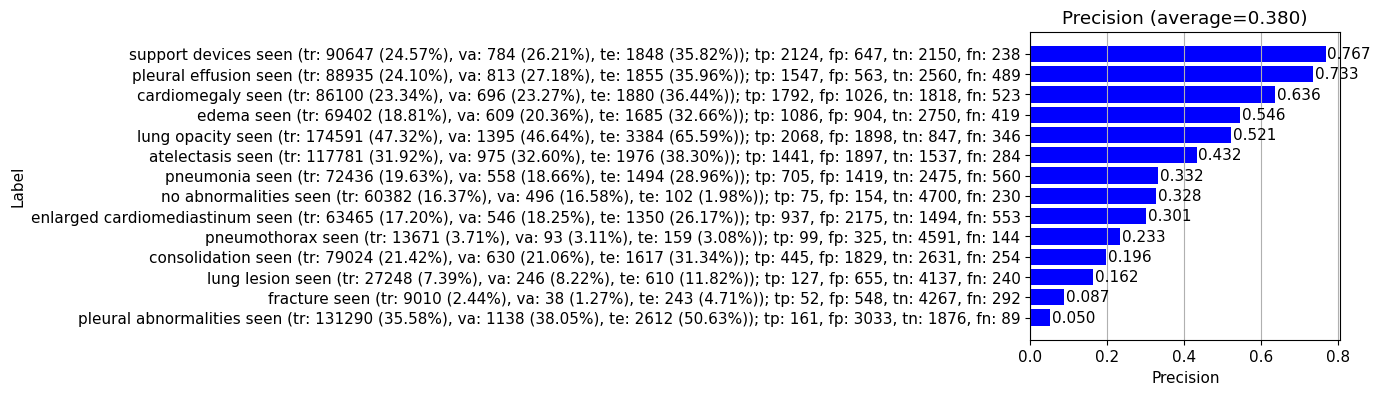

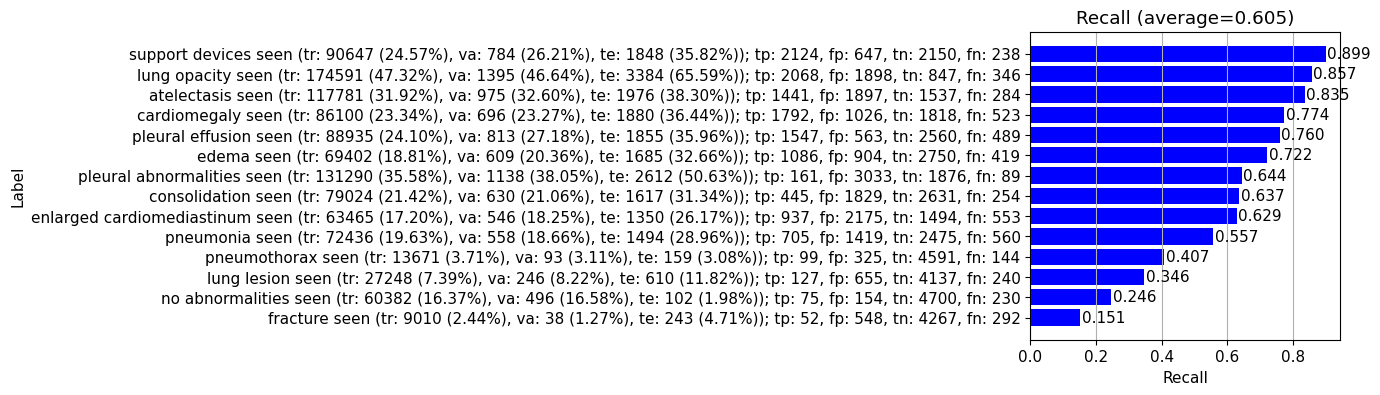

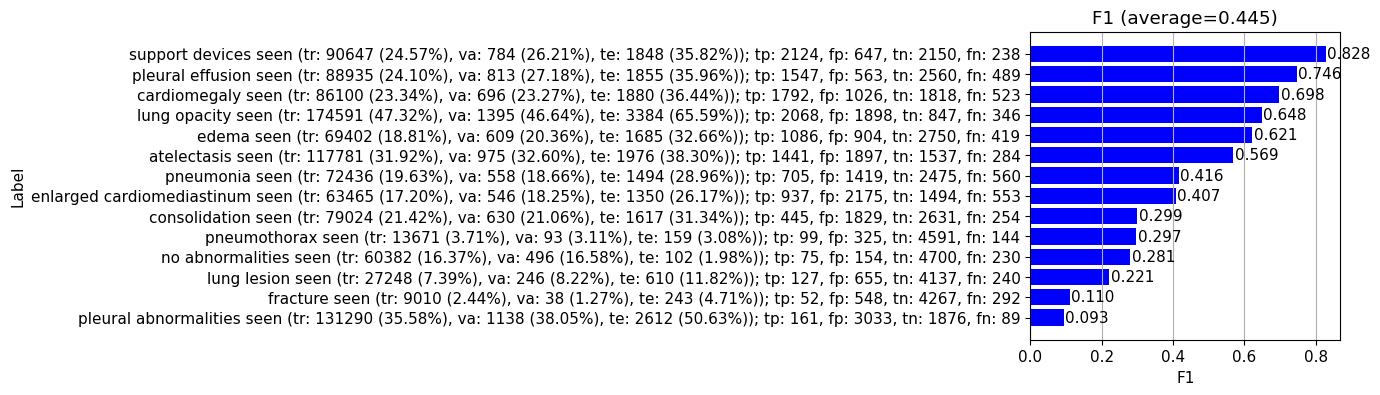

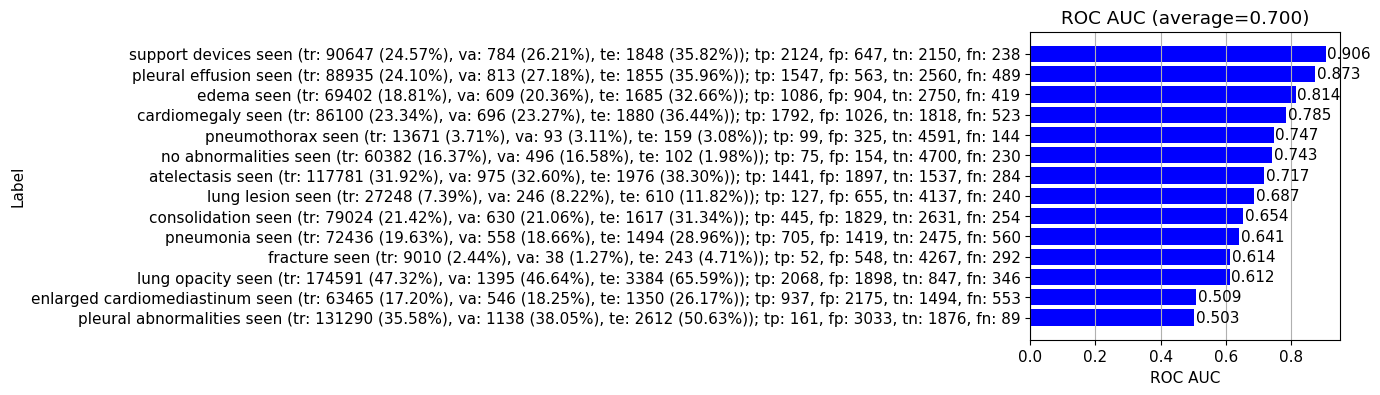

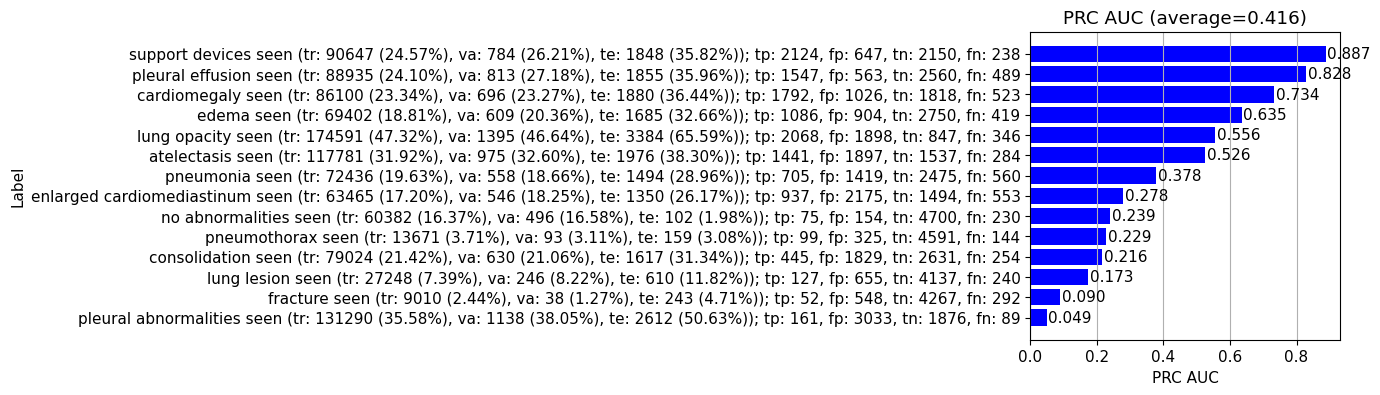

In [17]:
plot_label_based_metrics(
    metrics_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert,tuned_thresholds).pkl',
    label_based_facts=LABEL_BASED_FACTS__CHEXPERT,
    dicom_id_to_pos_neg_facts_filepath="/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl",
    metric_prefix='chexpert',
    figsize=(4,4),
)

# plot_label_based_metrics(
#     metrics_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_104907_mim-facts+vinbig_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert_nli_based_labels,tuned_thresholds).pkl',
#     label_based_facts=LABEL_BASED_FACTS__CHEXPERT,
#     dicom_id_to_pos_neg_facts_filepath="/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl",
#     metric_prefix='chexpert_nli_based_labels',
#     figsize=(4,4),
# )

# plot_label_based_metrics(
#     metrics_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_010353_mim-facts+vinbig_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_fact_classification_metrics(chexpert,tuned_thresholds).pkl',
#     label_based_facts=LABEL_BASED_FACTS__CHEXPERT,
#     dicom_id_to_pos_neg_facts_filepath="/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl",
#     metric_prefix='chexpert',
#     figsize=(4,4),
# )

In [8]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [ ]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based__template_based_report_gen" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--tune_thresholds \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json"

In [9]:
from medvqa.utils.files import list_filepaths_with_prefix_and_timestamps

In [11]:
list_filepaths_with_prefix_and_timestamps('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/',
                                         must_contain=['metric'])

[('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_report_gen_metrics(chexpert+mimic_cxr_lt+chest_imagenome,tuned_thresholds).pkl',
  '2024-04-30 18:15:22'),
 ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_report_gen_metrics(chest_imagenome,tuned_thresholds).pkl',
  '2024-04-30 17:49:52'),
 ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_report_gen_metrics(mimic_cxr_lt,tuned_thresholds).pkl',
  '2024-04-30 17:27:36'),
 ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/mimiccxr_test_set_report_gen_metrics(chexpert,tuned_thresholds).pkl',
  '2024-04-30 17:23:41'),
 ('/mnt/data/pamessina/workspaces/medvqa-workspa

In [12]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "mimiccxr_test_set_label_based__template_based_report_gen" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--tune_thresholds \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json" \
--use_alternative_chexpert_template \
--eval_chexpert_only

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: mimiccxr_test_set_label_based__template_based_report_gen
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: /mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_in

Chexpert: found 17373 unique sentences from 5159 texts
All labels found in cache, no need to invoke chexpert labeler
Chexpert: merged 17373 texts into 5159 texts
out.shape = (5159, 14)
(*) Chexpert: labeling 5159 texts ...
Chexpert: found 27 unique sentences from 5159 texts
Chexpert labeler: running a maximum of 10 concurrent processes over 1 chunks
chunk: i=0, b=0, e=26, chunk_size=26
	#### process 1: running chexpert labeler over 26 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20240430_231118_0.04962425531598158_0.csv --output_path /data/labeler-output_20240430_231118_0.04962425531598158_0.csv
	**** process 1 finished, elapsed time = 19.93267035484314
Cache successfully updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexpert_labeler_cache.pkl
Chexpert: merged 27 texts into 5159 texts
out.shape = (5159, 14)
Cache s

In [18]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "interpret_cxr_test_public_label_based__template_based_report_gen" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--tune_thresholds \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--use_alternative_chexpert_template \
--section_mode "both"

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: interpret_cxr_test_public_label_based__template_based_report_gen
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: /mnt/workspace/pamessina/medvqa-workspace/cache/mim

	#### process 9: running chexpert labeler over 618 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20240501_124852_0.9647495368550454_8.csv --output_path /data/labeler-output_20240501_124852_0.9647495368550454_8.csv
	#### process 10: running chexpert labeler over 616 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20240501_124852_0.9647495368550454_9.csv --output_path /data/labeler-output_20240501_124852_0.9647495368550454_9.csv
ERROR:root:No parse tree for sentence: 0
NoneType: None
	**** process 1 finished, elapsed time = 319.1220164299011
	**** process 2 finished, elapsed time = 319.1221401691437
	**** process 3 finished, elapsed time = 319.12222623825073
	**** process 4 finished, elapsed time = 319.1223

len(gen_reports) = 3677
len(gt_reports) = 3677
Computing report-level metrics...
Example gt text:
The cardiac silhouette size is unchanged, and appears mildly enlarged. Mediastinal and hilar contours are stable, and there is no evidence of pulmonary edema. No focal consolidation, pleural effusion or pneumothorax is present. There are mild degenerative changes of the thoracic spine. No acute cardiopulmonary process.
Example gen text:
no atelectasis seen. no calcification of the aorta seen. no cardiomegaly seen. no consolidation seen. no edema seen. no emphysema seen. no enlarged cardiomediastinum seen. no fibrosis seen. no fracture seen. no hernia seen. no infiltration seen. no lung lesion seen. no lung opacity seen. no mass seen. abnormalities seen. no nodule seen. no pleural effusion seen. no pleural abnormalities seen. no pleural thickening seen. no pneumomediastinum seen. no pneumonia seen. no pneumoperitoneum seen. no pneumothorax seen. no subcutaneous emphysema seen. no support de

Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexbert_labeler_cache.pkl
(*) Chexbert: labeling 3677 texts ...
3677it [00:01, 2632.71it/s]
All labels found in cache, no need to invoke chexbert labeler
(*) Chexbert: labeling 3677 texts ...
3677it [00:20, 182.65it/s]
Done labeling: 2 new labels found and cached
Cache successfully updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexbert_labeler_cache.pkl
Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/radgraph_labeler_cache_.pkl
(*) RadGraph: labeling 3677 texts ...
All labels found in cache, no need to invoke RadGraph labeler
(*) RadGraph: labeling 3677 texts ...
RadGraph: 9699 texts not found in cache, invoking RadGraph labeler ...
Cache successfully updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/radgraph_labeler_cache_.pkl
checkpoint_names = ['checkpoint_23_s2s_loss=0.9021.pt']
checkpoint_names = ['checkpoi

Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 3677 texts ...
Chexpert: found 16870 unique sentences from 3677 texts
All labels found in cache, no need to invoke chexpert labeler
Chexpert: merged 16870 texts into 3677 texts
out.shape = (3677, 14)
(*) Chexpert: labeling 3677 texts ...
Chexpert: found 186 unique sentences from 3677 texts
Chexpert labeler: running a maximum of 10 concurrent processes over 1 chunks
chunk: i=0, b=0, e=4, chunk_size=4
	#### process 1: running chexpert labeler over 4 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20240501_132305_0.5157209931744112_0.csv --output_path /data/labeler-output_20240501_132305_0.5157209931744112_0.csv
	**** process 1 finished, elapsed time = 19.337456941604614
Chexpert: merged 186 texts into 3677 texts
out

In [19]:
!python ../eval_fact_classification.py \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--eval_mode "interpret_cxr_test_public_label_based__template_based_report_gen" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--tune_thresholds \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--use_alternative_chexpert_template \
--section_mode "findings"

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: interpret_cxr_test_public_label_based__template_based_report_gen
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: /mnt/workspace/pamessina/medvqa-workspace/cache/mim

Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/seq2seq/20230908_232214_sentence2facts(gpt-4-06..es__v2;gpt-3.5-..es__v2;gpt-3.5-..iform);gpt-4-06..rdest);gpt-3.5-.._part1;gpt-3.5-.._part2)_Seq2Seq(t5-small)/checkpoint_23_s2s_loss=0.9021.pt
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.16s/it]
Saved updated T5 facts to /mnt/workspace/pamessina/medvqa-workspace/cache/t5_facts_cache((255, 68346214906703979)).pkl
New cache size = 718239
  0%|                                                 | 0/12702 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=424,3351509109300070142).pkl
len(self.cache["hashes"]) = 162029
self.cache["embeddings"].shape = (162029, 128)
100%|██████████████████████████████████| 12702/12702 [00:00<00:00, 89043.48it/s]
Computing embeddings for 6 new texts
Explicitly passing a `revision` is encouraged when loading a configuration with c

Generated reports successfully saved to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(mimic_cxr_lt,template,findings,thresholds).pkl
--------------------------------------------------
3) Computing report gen metrics with NLI-based labels and Chest ImaGenome facts
len(gen_reports) = 2692
len(gt_reports) = 2692
Computing report-level metrics...
Example gt text:
There has been interval worsening of moderate interstitial and airspace pulmonary edema. There is new collapse of the right upper lobe with superior retraction of the major fissure, likely due to bronchial encasement by right hilar adenopathy as seen on CT. There are innumerable metastatic pulmonary nodules and multifocal hazy opacities, better characterized on CT. Moderate cardiomegaly and central vascular congestion persist. Small bilateral pleural effusions, multiloculated on the left.
Example gen text:
airsp

Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 2692 texts ...
Chexpert: found 10719 unique sentences from 2692 texts
All labels found in cache, no need to invoke chexpert labeler
Chexpert: merged 10719 texts into 2692 texts
out.shape = (2692, 14)
(*) Chexpert: labeling 2692 texts ...
Chexpert: found 186 unique sentences from 2692 texts
Chexpert labeler: running a maximum of 10 concurrent processes over 1 chunks
chunk: i=0, b=0, e=4, chunk_size=4
	#### process 1: running chexpert labeler over 4 texts ...
	Command = docker run --rm -v /mnt/data/pamessina/workspaces/medvqa-workspace/tmp/chexpert-labeler:/data chexpert-labeler:latest python label.py --reports_path /data/labeler-input_20240501_140705_0.6006346198540968_0.csv --output_path /data/labeler-output_20240501_140705_0.6006346198540968_0.csv
	**** process 1 finished, elapsed time = 19.022574424743652
Chexpert: merged 186 texts into 2692 texts
out

In [4]:
from medvqa.eval_fact_classification import export_generated_reports_to_txt
from medvqa.utils.files import load_pickle

In [3]:
export_generated_reports_to_txt('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(chexpert,template,findings,thresholds,v1).pkl')

Saved generated reports to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(chexpert,template,findings,thresholds,v1).pkl.txt


In [13]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240426_072308_mim-facts_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(chexpert,template,findings,thresholds,v1).pkl')

In [14]:
len(tmp['gen_reports']), len(tmp['gt_reports'])

(2692, 2692)

In [15]:
tmp['gen_reports'][0], tmp['gt_reports'][0]

('findings are present. the mediastinal contour is normal. heart size is normal. no pulmonary nodules or mass lesions identified. one or more airspace opacities are seen. pulmonary edema is seen. there is focal consolidation. no pneumonia. appearance suggest atelectasis. no pneumothorax is seen. pleural effusion is seen. pleural thickening is present. no fracture is seen. a device is seen',
 'Bedside upright AP radiograph of the chest demonstrates little interval change when compared to prior study performed 24 hours ago. There is minimal, stable enlargement of the cardiomediastinal contours consistent with mild chronic heart failure. Persistent obscuration of the pulmonary vascular markings in the right lung base is consistent with trace pulmonary edema. Bibasilar atelectasis is still present. The lungs are otherwise clear. There is no pneumothorax or pleural effusion. A left internal jugular central venous catheter, an endotracheal tube, and an orogastric tube are unchanged and appro

In [16]:
from f1chexbert import F1CheXbert
f1chexbert = F1CheXbert()
accuracy, accuracy_not_averaged, class_report, class_report_5 = f1chexbert(hyps=tmp['gen_reports'], refs=tmp['gt_reports'])

In [17]:
class_report['micro avg']

{'precision': 0.336965904186448,
 'recall': 0.4323688218191887,
 'f1-score': 0.3787520465708568,
 'support': 7223}

In [12]:
# accuracy, accuracy_not_averaged, class_report, class_report_5

In [31]:
from medvqa.utils.common import INTERPRET_CXR_TEST_PUBLIC_CSV_PATH
import pandas as pd

In [32]:
df = pd.read_csv(INTERPRET_CXR_TEST_PUBLIC_CSV_PATH)

In [35]:
df.iloc[0]['images_path']

"['/mnt/researchers/denis-parra/datasets/interpret-cxr-test-public-jpg/test_public/image_1_view_0.jpg']"

In [99]:
!python ../eval_fact_classification.py \
--eval_mode "interpret_cxr_test_public_label_based__generate_jsons_for_report_gen" \
--section_mode "findings" \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)" \
--num_workers 2 \
--max_images_per_batch 40 \
--max_facts_per_image 100 \
--device "cuda" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--dicom_id_to_pos_neg_facts_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_dicom_id_to_all_pos_neg_facts(hash=1013,1477415609053716381).pkl" \
--tune_thresholds \
--f1_threshold 0.2

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)
   num_workers: 2
   max_images_per_batch: 40
   max_facts_per_image: 100
   device: cuda
   eval_mode: interpret_cxr_test_public_label_based__generate_jsons_for_report_gen
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: /mnt/workspace/pamessina/me

In [107]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public__label_based_json(section=findings)(hash=386,2710559156903355699).pkl')

In [108]:
len(tmp)

2692

In [114]:
import json

aux = json.loads(tmp[5]['json_string'])
aux

{'num_images': 1,
 'yes': ['no abnormalities: yes(0.53); 0.617; 0.0125'],
 'no': ['opacity texture: no(0.06); 0.829; 0.4296',
  'lung opacity: no(0.04); 0.806; 0.4152',
  'interstitial texture: no(0.05); 0.721; 0.3583',
  'pleural abnormalities: no(0.05); 0.780; 0.3205',
  'airspace opacity: no(0.03); 0.695; 0.2887',
  'alveolar texture: no(0.13); 0.625; 0.2880',
  'linear/patchy atelectasis: no(0.06); 0.647; 0.2703',
  'fluid overload/heart failure: no(0.00); 0.737; 0.2692',
  'atelectasis: no(0.01); 0.636; 0.2425',
  'cardiomegaly: no(0.00); 0.673; 0.2307',
  'enlarged cardiac silhouette: no(0.00); 0.671; 0.2288',
  'pleural effusion: no(0.01); 0.746; 0.2276',
  'support devices: no(0.07); 0.699; 0.2267',
  'lobar/segmental collapse: no(0.02); 0.608; 0.2177',
  'edema: no(0.00); 0.671; 0.2067',
  'consolidation: no(0.01); 0.576; 0.1984',
  'pneumonia: no(0.01); 0.547; 0.1833',
  'vascular congestion: no(0.00); 0.621; 0.1790',
  'infiltration: no(0.00); 0.550; 0.1710',
  'enlarged car

In [77]:
from medvqa.datasets.mimiccxr import load_mimiccxr_reports_detailed_metadata

In [78]:
metadata = load_mimiccxr_reports_detailed_metadata()

In [79]:
metadata.keys()

dict_keys(['part_ids', 'subject_ids', 'study_ids', 'dicom_id_view_pos_pairs', 'splits', 'filepaths'])

In [80]:
metadata['filepaths'][0]

'/mnt/data/mimic-cxr/files/p10/p10703179/s58829627.txt'

In [89]:
with open(metadata['filepaths'][1], 'r') as f:
    print(f.read())

                                 FINAL REPORT
 INDICATION:  Chest pain.
 
 No comparison studies available.
 
 FRONTAL AND LATERAL CHEST RADIOGRAPHS:  There is a mild pectus deformity.  The
 heart size is normal.  The hilar and mediastinal contours are within normal
 limits.  There is no pneumothorax, focal consolidation, or pleural effusion.
 
 IMPRESSION:  No acute intrathoracic process.



In [128]:
!python ../scripts/openai/convert_templates_to_reports.py \
--template_based_reports_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public__label_based_json(section=findings)(hash=386,2710559156903355699).pkl" \
--alias "(v1)" \
--max_requests_per_minute 8000 \
--max_tokens_per_minute 280000 \
--max_tokens_per_request 900 \
--logging_level "INFO" \
--api_key_name "OPENAI_API_KEY_1" \
--openai_model_name "gpt-4"

2024-05-07 04:54:10,505 - INFO - Loaded 610 already processed queries from /home/pamessina/medvqa-workspace/cache/openai/gpt-4_templates_to_reports(v1).jsonl
2024-05-07 04:54:10,505 - INFO - Loading template-based reports from /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public__label_based_json(section=findings)(hash=386,2710559156903355699).pkl
2024-05-07 04:54:10,511 - INFO - Queries to make: 2692 (before removing queries that have already been processed)
2024-05-07 04:54:10,513 - INFO - Queries to make: 2082 (after removing queries that have already been processed)
2024-05-07 04:54:10,513 - INFO - Removed 610 queries that have already been processed
2024-05-07 04:54:10,513 - INFO - Example queries to make:
2024-05-07 04:54:10,513 - INFO - Query 1846: {
 "num_images": 2,
 "yes": [
  "opacity texture: yes(0.45),yes(0.49); 0.829; 0.4296",
  "lung opacity: yes(0.69

2024-05-07 05:01:51,944 - INFO - Starting request #1150
2024-05-07 05:02:14,645 - INFO - Starting request #1200
2024-05-07 05:02:37,391 - INFO - Starting request #1250
2024-05-07 05:03:00,208 - INFO - Starting request #1300
2024-05-07 05:03:23,012 - INFO - Starting request #1350
2024-05-07 05:03:45,596 - INFO - Starting request #1400
2024-05-07 05:04:08,588 - INFO - Starting request #1450
2024-05-07 05:04:31,090 - INFO - Starting request #1500
2024-05-07 05:04:49,317 - WARNING - Request 1523 failed with error {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_564cd9ae507550cfa78d61861c28503c in your email.)', 'type': 'server_error', 'param': None, 'code': None}
2024-05-07 05:04:53,562 - INFO - Starting request #1549
2024-05-07 05:05:16,453 - INFO - Starting request #1599
2024-05-07 05:05:39,047 - INFO - Start

In [7]:
from medvqa.utils.files import load_jsonl
import json

In [3]:
tmp = load_jsonl('/home/pamessina/medvqa-workspace/cache/openai/gpt-4_templates_to_reports(v1).jsonl')

In [4]:
len(tmp)

2692

In [9]:
print(tmp[0]['metadata']['query'])

{
 "num_images": 2,
 "yes": [
  "opacity texture: yes(0.31),no(0.30); 0.829; 0.4296",
  "lung opacity: yes(0.40),yes(0.38); 0.806; 0.4152",
  "interstitial texture: yes(0.36),yes(0.33); 0.721; 0.3583"
 ],
 "no": [
  "pleural abnormalities: no(0.70),no(0.54); 0.780; 0.3205",
  "airspace opacity: no(0.21),no(0.21); 0.695; 0.2887",
  "alveolar texture: no(0.29),no(0.23); 0.625; 0.2880",
  "linear/patchy atelectasis: no(0.35),no(0.39); 0.647; 0.2703",
  "fluid overload/heart failure: no(0.34),no(0.15); 0.737; 0.2692",
  "atelectasis: no(0.25),no(0.29); 0.636; 0.2425",
  "cardiomegaly: no(0.34),no(0.16); 0.673; 0.2307",
  "enlarged cardiac silhouette: no(0.39),no(0.22); 0.671; 0.2288",
  "pleural effusion: no(0.14),no(0.07); 0.746; 0.2276",
  "support devices: no(0.11),no(0.09); 0.699; 0.2267",
  "lobar/segmental collapse: no(0.22),no(0.28); 0.608; 0.2177",
  "edema: no(0.22),no(0.07); 0.671; 0.2067",
  "consolidation: no(0.12),no(0.13); 0.576; 0.1984",
  "pneumonia: no(0.11),no(0.10); 0.54

In [11]:
findings = tmp[0]['parsed_response']['findings']
impression = tmp[0]['parsed_response']['impression']
print('FINDINGS:')
print(findings)
print()
print('IMPRESSION:')
print(impression)

FINDINGS:
The chest X-ray images show some opacity texture and lung opacity. There is also an interstitial texture present. The cardiomediastinal silhouette, pulmonary vasculature, and pleural spaces are within normal limits. There are no signs of pleural abnormalities, airspace opacity, alveolar texture, or atelectasis. The heart size is normal with no signs of cardiomegaly or an enlarged cardiac silhouette. There is no evidence of pleural effusion, fluid overload, heart failure, or pneumonia. No support devices are seen in the images.

IMPRESSION:
The images suggest the presence of some interstitial changes and lung opacity. However, there are no acute intrathoracic processes. Further clinical correlation is recommended.


In [8]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [ ]:
!python ../eval_fact_classification.py \
--eval_mode "interpret_cxr_test_public_label_based__json_to_gpt_report_gen" \
--section_mode "findings" \
--label_based_json_reports_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public__label_based_json(section=findings)(hash=386,2710559156903355699).pkl" \
--json_to_gpt_reports_jsonl_filepath \
"/home/pamessina/medvqa-workspace/cache/openai/gpt-4_templates_to_reports(v1).jsonl"

In [2]:
from medvqa.eval_fact_classification import export_generated_reports_to_txt
export_generated_reports_to_txt('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(json_to_gpt,findings).pkl')

len(gen_reports) = 2692
Saved generated reports to /mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(json_to_gpt,findings).pkl.txt


In [9]:
!python ../eval_fact_classification.py \
--eval_mode "interpret_cxr_compute_and_save_label_based_predictions" \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)" \
--num_workers 4 \
--max_images_per_batch 120 \
--max_facts_per_image 100 \
--device "cuda" \
--mimiccxr_interpret_cxr_challenge_split_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/mimiccxr_splits.pkl" \
--iuxray_interpret_cxr_challenge_split_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/openi_splits.pkl" \
--chexpert_interpret_cxr_challenge_split_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/chexpert_splits.pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda"

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)
   num_workers: 4
   max_images_per_batch: 120
   max_facts_per_image: 100
   device: cuda
   eval_mode: interpret_cxr_compute_and_save_label_based_predictions
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: /mnt/workspace/pamessina/medvqa-workspace

In [24]:
!python ../eval_fact_classification.py \
--eval_mode "interpret_cxr_compute_and_save_label_based_predictions" \
--checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)" \
--num_workers 4 \
--max_images_per_batch 120 \
--max_facts_per_image 100 \
--device "cuda" \
--mimiccxr_interpret_cxr_challenge_split_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/mimiccxr_splits.pkl" \
--iuxray_interpret_cxr_challenge_split_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/openi_splits.pkl" \
--chexpert_interpret_cxr_challenge_split_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/chexpert_splits.pkl" \
--mimiccxr_report_fact_nli_integrated_data_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr_integrated_data(hash=1649,2670402002373726730).pkl" \
--fact_embedding_model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--fact_embedding_model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)" \
--fact_embedding_batch_size 200 \
--fact_embedding_num_workers 2 \
--fact_embedding_device "cuda"

script's arguments:
   checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)
   num_workers: 4
   max_images_per_batch: 120
   max_facts_per_image: 100
   device: cuda
   eval_mode: interpret_cxr_compute_and_save_label_based_predictions
   fact_embedding_model_name: microsoft/BiomedVLP-CXR-BERT-specialized
   fact_embedding_model_checkpoint_folder_path: /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20240207_184445_MIMIC-CXR(triplets+classif+entcont+nli+radgraph+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)
   fact_embedding_batch_size: 200
   fact_embedding_num_workers: 2
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: /mnt/workspace/pamessina/medvqa-workspace

In [25]:
!ls -lh "/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr__label_based_probs_and_features(hash=270,2246280145995586625).pkl"

-rw-rw-r-- 1 pamessina pamessina 1.5G May 13 23:00 '/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr__label_based_probs_and_features(hash=270,2246280145995586625).pkl'


In [72]:
!python ../eval_fact_classification.py \
--eval_mode "interpret_cxr_test_public__similarity_based_report_retrieval" \
--section_mode "findings" \
--interpret_cxr_public_test_set_source_predictions_filepath \
"/mnt/workspace/interpret-cxr-test-public-jpg/public_source_pred.csv" \
--interpret_cxr_label_based_predictions_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr__label_based_predictions(hash=368,3828061853141051818).pkl" \
--background_findings_and_impression_per_report_filepath \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json"

script's arguments:
   checkpoint_folder_path: None
   num_workers: 4
   max_images_per_batch: 30
   max_facts_per_image: 20
   device: cuda
   eval_mode: interpret_cxr_test_public__similarity_based_report_retrieval
   fact_embedding_model_name: None
   fact_embedding_model_checkpoint_folder_path: None
   fact_embedding_batch_size: 32
   fact_embedding_num_workers: 4
   fact_embedding_device: cuda
   chexpert_labels_filepath: None
   chest_imagenome_label_names_filepath: None
   chest_imagenome_image_id_to_labels_filepath: None
   mimiccxr_report_fact_nli_integrated_data_filepath: None
   tune_thresholds: False
   max_processes_for_chexpert_labeler: 14
   background_findings_and_impression_per_report_filepath: /mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json
   use_alternative_chexpert_template: False
   eval_chexpert_only: False
   section_mode: findings
   dicom_id_to_pos_neg_facts_filepath: None
   f1_threshold: 0

BLEU scores: [0.15649270978819665, 0.07552802189533048, 0.03880891275324507, 0.021329390059437178]
ROUGE-L score: 0.10059476105975777
METEOR score: 0.2079119024983755
CIDEr-D score: 0.024761052741222422
Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chexpert_labeler_cache.pkl
(*) Chexpert: labeling 2692 texts ...
Chexpert: found 10719 unique sentences from 2692 texts
All labels found in cache, no need to invoke chexpert labeler
Chexpert: merged 10719 texts into 2692 texts
out.shape = (2692, 14)
(*) Chexpert: labeling 2692 texts ...
Chexpert: found 10997 unique sentences from 2692 texts
Chexpert labeler: running a maximum of 14 concurrent processes over 14 chunks
chunk: i=0, b=0, e=513, chunk_size=513
chunk: i=1, b=513, e=1026, chunk_size=513
chunk: i=2, b=1026, e=1539, chunk_size=513
chunk: i=3, b=1539, e=2052, chunk_size=513
chunk: i=4, b=2052, e=2565, chunk_size=513
chunk: i=5, b=2565, e=3078, chunk_size=513
chunk: i=6, b=3078, e=3591, chunk_size

Cache successfully loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/cache/radgraph_labeler_cache_.pkl
(*) RadGraph: labeling 2692 texts ...
All labels found in cache, no need to invoke RadGraph labeler
(*) RadGraph: labeling 2692 texts ...
RadGraph: 2337 texts not found in cache, invoking RadGraph labeler ...
Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPr

In [32]:
from medvqa.utils.files import load_pickle
from sklearn.metrics import f1_score
from medvqa.utils.metrics import f1_between_dicts
import numpy as np

In [73]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_report_gen_metrics(similarity_based_report_retrieval,findings).pkl')

In [74]:
tmp.keys()

dict_keys(['bleu-1', 'bleu-2', 'bleu-3', 'bleu-4', 'rougeL', 'meteor', 'ciderD', 'chexpert_labels_gt', 'chexpert_labels_gen', 'chexbert_labels_gt', 'chexbert_labels_gen', 'radgraph_labels_gt', 'radgraph_labels_gen', 'fact_embedding_soft', 'fact_embedding_p', 'fact_embedding_r', 'fact_embedding_f1', 'bert_score_p', 'bert_score_r', 'bert_score_f1'])

In [77]:
tmp2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(similarity_based_report_retrieval,findings).pkl')

In [78]:
tmp2.keys()

dict_keys(['gen_reports', 'gt_reports', 'gt_image_paths_list', 'gen_report_image_paths', 'gen_report_sources', 'gen_report_similarity_scores'])

In [145]:
reload(medvqa.evaluation.plots)
reload(medvqa.eval_fact_classification)

<module 'medvqa.eval_fact_classification' from '/home/pamessina/medvqa/medvqa/eval_fact_classification.py'>

In [146]:
from medvqa.utils.logging import print_bold
from medvqa.evaluation.plots import plot_images
from medvqa.eval_fact_classification import ReportRetrievalVisualizer

In [147]:
rrv = ReportRetrievalVisualizer(
    metrics_filepath='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_report_gen_metrics(similarity_based_report_retrieval,findings).pkl',
    gen_reports_filepath='/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_gen_reports(similarity_based_report_retrieval,findings).pkl',
)

Ground truth report:
The patient has had a prior sternal resection with consequent deformity of the anterior chest wall. The trachea is central. The cardiomediastinal contour is within normal limits. Coronary artery bypass graft clips are seen. A spiculated opacity in the right upper lung is less conspicuous than on the prior chest radiograph from ___ a more ill-defined opacity in the left mid lung is similar in appearance. Both of these opacities were seen on the prior CT chest. No pneumothorax or pleural effusion seen. The visualized bony structures are demineralized but otherwise unremarkable in appearance.

Ground truth image paths:
['/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_134_view_0.jpg', '/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_134_view_1.jpg']



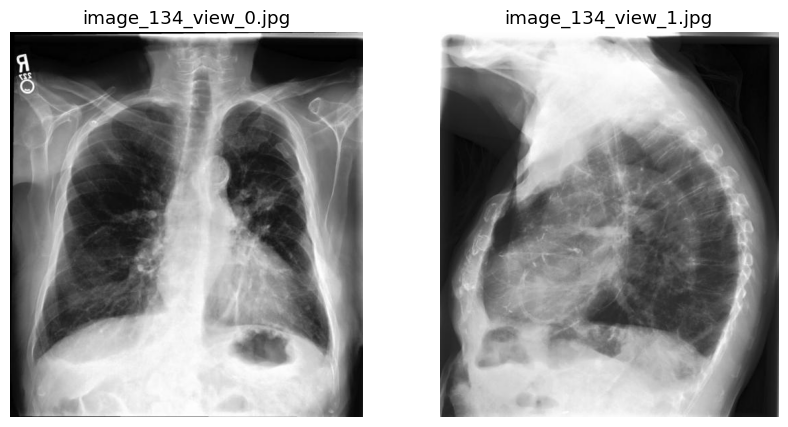

Most similar report:
Frontal and lateral views of the chest demonstrates linear opacities in the right lung base, likely representing atelectasis. A tracheostomy is present. There is slight increase in AP diameter of the lung with mild flattening of the hemidiaphragms, which may be consistent with emphysema. Minimal bronchial wall thickening is seen on lateral views. There is no focal consolidation or pleural effusion. Cardiomediastinal silhouette is within normal limits. An anterior wedge deformity of a mid thoracic vertebral body is seen. Diffuse osteopenia is also present. 1. NO FOCAL CONSOLIDATION. FINDINGS OF HYPERINFLATION AND BRONCHIAL WALL THICKENING MAY BE CONSISTENT WITH EMPHYSEMA. 2. ANTERIOR WEDGE DEFORMITY OF A MID THORACIC VERTEBRAL BODY IS PRESENT, OF UNCERTAIN CHRONICITY.

Most similar image paths:
['/mnt/workspace/chexpert/CheXpert-v1.0-small/train/patient06240/study1/view1_frontal.jpg', '/mnt/workspace/chexpert/CheXpert-v1.0-small/train/patient06240/study1/view2_later

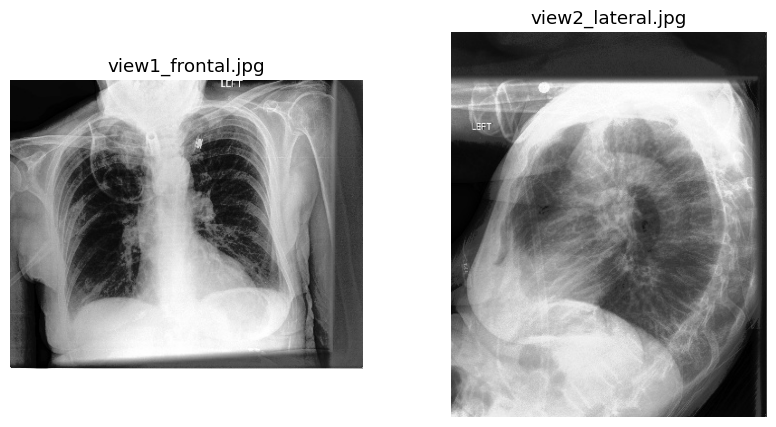

Predicted source:
CheXpert

Similarity score:
1.9370153139355362

Metrics:
bleu-1: 0.270
bleu-2: 0.146
bleu-3: 0.083
bleu-4: 0.047
ciderD: 0.000
rougeL: 0.166
meteor: 0.294
Chexpert labels:
Accuracy: 0.929
GT: ['Lung Opacity']
Gen: ['Lung Opacity', 'Atelectasis']
Chexbert labels:
Accuracy: 0.857
GT: ['Lung Opacity']
Gen: ['Lung Opacity', 'Atelectasis', 'Support Devices']
Radgraph F1:
0.17840375586854462
fact_embedding_soft:
0.5536792
fact_embedding_p:
0.375
fact_embedding_r:
0.30769232
fact_embedding_f1:
0.33802816


In [148]:
rrv.visualize(103)